#### Importamos los módulos

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
from pandas_datareader import data as pdr
import warnings
plt.style.use('seaborn-colorblind')
warnings.filterwarnings("ignore")

In [2]:
# Fijamos la semilla (random)
np.random.seed(123)

# Esto es de la notebook anterior:

Me lo traigo porque vamos a necesitar los retornos mensuales

Symbols,AMZN,GOOG,TSLA,NFLX,MELI
Date,,,,,
2015-01-30,NaN,NaN,NaN,NaN,NaN
2015-02-27,0.072293,0.044676,-0.001277,0.074943,0.056721
2015-03-31,-0.021202,-0.018625,-0.071653,-0.122592,-0.063724
2015-04-30,0.133512,-0.016760,0.197489,0.335525,0.161688
2015-05-29,0.017663,-0.009733,0.109489,0.121402,0.019672
...,...,...,...,...,...
2021-01-29,-0.015576,0.047869,0.124506,-0.015424,0.062255
2021-02-26,-0.035328,0.109558,-0.148740,0.012134,-0.079460
2021-03-31,0.000372,0.015597,-0.011207,-0.031901,-0.101318


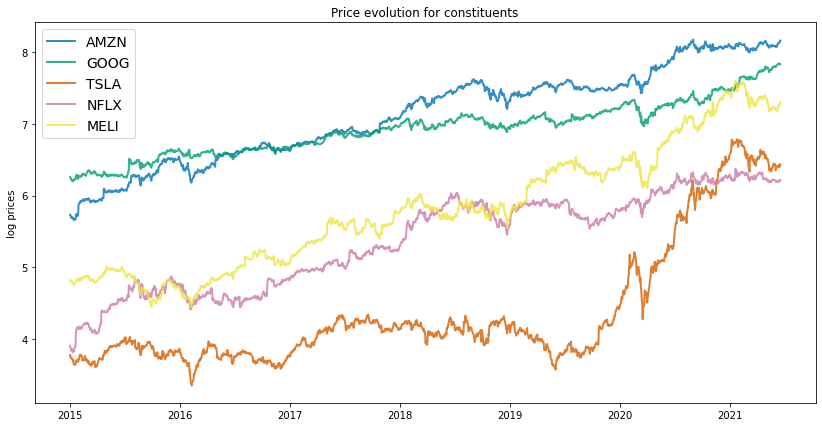

In [3]:
## acá define 5 tickers y con pdr.get_data_yahoo los va a buscar a internet. 
## va desde el 2015-01-01 hasta la fecha de hoy: dt.date.today()
## y toma el valor ajustado al cierre ("Adj Close")

tickers = ['AMZN', 'GOOG', 'TSLA', 'NFLX', 'MELI']
prices = pdr.get_data_yahoo(tickers, start = '2015-01-01', end=dt.date.today())['Adj Close']
prices

prices.columns

## aca hace un plot de los precios en el tiempo
plt.figure(figsize=(14,7))

## para cada ticker ['AMZN', 'GOOG', 'TSLA', 'NFLX', 'MELI'] itera
for i in prices.columns.values:
    
    ##y plotea el index que es la fecha contra el logaritmo de los precios de ese ticker
    plt.plot(prices.index, np.log(prices[i]), lw = 2, alpha = 0.8, label = i)
    
    ## agrega la leyenda arriba a la izquierda (la cajita con los nombres de los tickers)
    plt.legend(loc = 'upper left', fontsize = 14)
    
plt.ylabel('log prices')
plt.title('Price evolution for constituents')

#### Retornos (diarios y mensuales)

## acá va a cambiar los precios a los retornos %
## el método pct_change hace basicamente: 
## "(el precio de ahora - el precio de la fila de arriba)/el precio de la fila de arriba "
returns = prices.pct_change()

## asfreq resamplea la serie de tiempo. 
## BM significa "business month end frequency"
## o sea, el precio a fin de mes (hábil)
## con .ffill() si falta un dato lo completa con el último válido
monthly_prices = prices.asfreq(freq='BM').ffill()
monthly_prices


## acá vuelve a calcular retornos, pero esta vez calcula retornos mensuales
## está tomando los precios mensuales que sacó recién y obtiene el retorno % 
monthly_returns = monthly_prices.pct_change()
monthly_returns

## Modelos Factoriales: CAPM
Nos servirán para construir los _inputs_ iniciales a la hora de refinar proceso de estimación, así como entender las características del portafolio a lo largo del tiempo.

In [4]:
import urllib.request
import zipfile


## define la url de donde va a bajar la data (un zip con un csv adentro)
ff_url = "https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/ftp/F-F_Research_Data_Factors_CSV.zip"
## descarga la data 
urllib.request.urlretrieve(ff_url,'fama_french.zip')

## abre el archivo zip
zip_file = zipfile.ZipFile('fama_french.zip', 'r')
## y extrae todo
zip_file.extractall()
## cierra el archivo zip.
zip_file.close()
## levanta el csv que extrajo del zip
ff_factors = pd.read_csv('./F-F_Research_Data_Factors.CSV', skiprows = 3)

In [5]:
## asi se ve el principio del csv
print(ff_factors.head())

  Unnamed: 0    Mkt-RF       SMB       HML        RF
0     192607      2.96     -2.30     -2.87      0.22
1     192608      2.64     -1.40      4.19      0.25
2     192609      0.36     -1.32      0.01      0.23
3     192610     -3.24      0.04      0.51      0.32
4     192611      2.53     -0.20     -0.35      0.31


In [6]:
## asi se ve el final del csv
print(ff_factors.tail(100))

                              Unnamed: 0    Mkt-RF       SMB       HML  \
1135                              202102      2.78      2.11      7.08   
1136                              202103      3.08     -2.48      7.40   
1137                              202104      4.94     -3.09     -0.75   
1138   Annual Factors: January-December        NaN       NaN       NaN   
1139                                 NaN    Mkt-RF       SMB       HML   
...                                  ...       ...       ...       ...   
1230                                2017     21.51     -4.96    -13.84   
1231                                2018     -6.93     -3.15     -9.34   
1232                                2019     28.28     -6.26    -10.68   
1233                                2020     23.67     13.07    -47.20   
1234    Copyright 2021 Kenneth R. French       NaN       NaN       NaN   

            RF  
1135      0.00  
1136      0.00  
1137      0.00  
1138       NaN  
1139        RF  
...      

In [7]:
print(ff_factors.iloc[1124:1138],)

     Unnamed: 0    Mkt-RF       SMB       HML        RF
1124     202003    -13.38     -5.03    -13.96      0.12
1125     202004     13.65      2.75     -1.39      0.00
1126     202005      5.58      2.49     -5.05      0.01
1127     202006      2.46      2.71     -2.35      0.01
1128     202007      5.77     -2.18     -1.39      0.01
1129     202008      7.63     -0.25     -2.94      0.01
1130     202009     -3.63      0.06     -2.51      0.01
1131     202010     -2.10      4.44      4.03      0.01
1132     202011     12.47      5.48      2.11      0.01
1133     202012      4.63      4.81     -1.36      0.01
1134     202101     -0.03      7.19      2.85      0.00
1135     202102      2.78      2.11      7.08      0.00
1136     202103      3.08     -2.48      7.40      0.00
1137     202104      4.94     -3.09     -0.75      0.00


In [8]:
## levanta de nuevo el csv, lee de la fila 3 a la 1138
ff_factors = pd.read_csv('F-F_Research_Data_Factors.CSV', skiprows = 3, nrows = 1138)
print(ff_factors.tail())
print(ff_factors.head())

      Unnamed: 0  Mkt-RF   SMB   HML    RF
1133      202012    4.63  4.81 -1.36  0.01
1134      202101   -0.03  7.19  2.85  0.00
1135      202102    2.78  2.11  7.08  0.00
1136      202103    3.08 -2.48  7.40  0.00
1137      202104    4.94 -3.09 -0.75  0.00
   Unnamed: 0  Mkt-RF   SMB   HML    RF
0      192607    2.96 -2.30 -2.87  0.22
1      192608    2.64 -1.40  4.19  0.25
2      192609    0.36 -1.32  0.01  0.23
3      192610   -3.24  0.04  0.51  0.32
4      192611    2.53 -0.20 -0.35  0.31


In [9]:
## levanta de nuevo el csv, pero ahora setea la primer columna como indice
## todo lo anterior no cumple mucha funcion
## podríamos haber arrancado con este

## entiendo que lo que tenemos acá son los retornos de los factores para cada mes y cada año
## tipo el factor SMB en diciembre 2020 dio un retorno de 4.81%
## el retorno está calculado segun el portfolio long-short construido con el factor
## pero por favor avisen si esta explicación no es la correcta

ff_factors = pd.read_csv('F-F_Research_Data_Factors.CSV', skiprows = 3,
nrows = 1138, index_col = 0)
print(ff_factors.tail())

        Mkt-RF   SMB   HML    RF
202012    4.63  4.81 -1.36  0.01
202101   -0.03  7.19  2.85  0.00
202102    2.78  2.11  7.08  0.00
202103    3.08 -2.48  7.40  0.00
202104    4.94 -3.09 -0.75  0.00


In [10]:
## convierte el indice a un tipo de dato datetime (para manejarlo como fecha)
## el solo tenía año y mes. Pandas asume que es el primer día del mes, asi que lo va a
## tener que corregir
ff_factors.index = pd.to_datetime(ff_factors.index, format= '%Y%m')
print(ff_factors.tail())

            Mkt-RF   SMB   HML    RF
2020-12-01    4.63  4.81 -1.36  0.01
2021-01-01   -0.03  7.19  2.85  0.00
2021-02-01    2.78  2.11  7.08  0.00
2021-03-01    3.08 -2.48  7.40  0.00
2021-04-01    4.94 -3.09 -0.75  0.00


In [11]:
##  acá lo corrije. Cambia la fecha: de ser el primer día del mes, a ser el último
ff_factors.index = ff_factors.index + pd.offsets.MonthEnd()
ff_factors.tail()

,Mkt-RF,SMB,HML,RF
2020-12-31,4.63,4.81,-1.36,0.01
2021-01-31,-0.03,7.19,2.85,0.00
2021-02-28,2.78,2.11,7.08,0.00
2021-03-31,3.08,-2.48,7.40,0.00
2021-04-30,4.94,-3.09,-0.75,0.00


In [12]:
## divide todos los factores por 100 
ff_factors = ff_factors.apply(lambda x: x/ 100)
ff_factors.tail()

,Mkt-RF,SMB,HML,RF
2020-12-31,0.0463,0.0481,-0.0136,0.0001
2021-01-31,-0.0003,0.0719,0.0285,0.0000
2021-02-28,0.0278,0.0211,0.0708,0.0000
2021-03-31,0.0308,-0.0248,0.0740,0.0000
2021-04-30,0.0494,-0.0309,-0.0075,0.0000


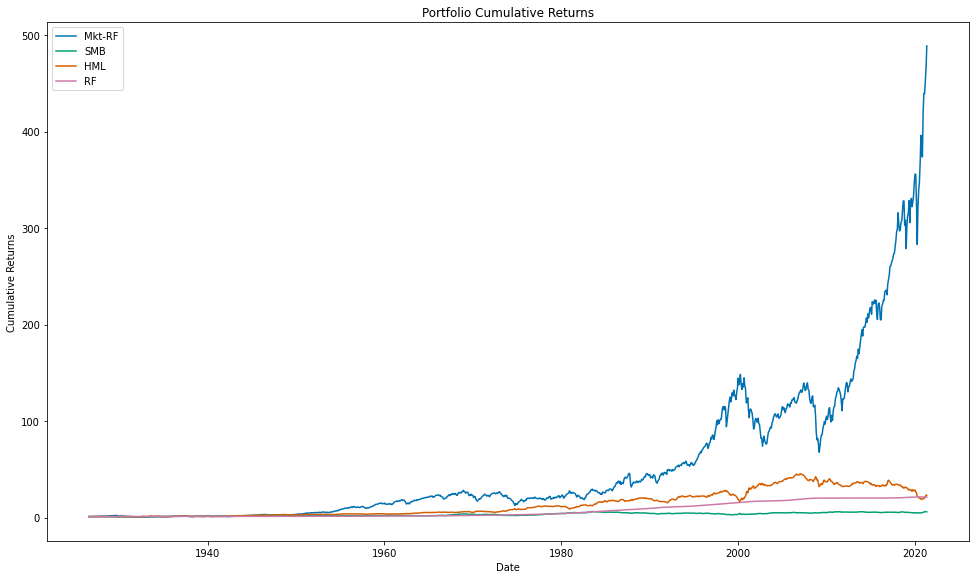

In [13]:
# le suma 1 a todos los factores y hace el producto acumulado
# o sea, el tenia los retornos en %, los divide por 100 y les suma 1
# entonces si tenés un retorno del 4% te queda 1.04
# y despues va multiplicando los retornos para componer:
# si tenias un retorno del 4% en el primer tiempo y un retorno del 2% en el segundo
# te queda 1.04 * 1.02
cumulative_factor_returns = (ff_factors + 1).cumprod()

## plotea:
fig = plt.figure(figsize=(16,9))
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.plot(cumulative_factor_returns)
ax1.set_xlabel('Date')
ax1.legend(cumulative_factor_returns.columns, loc = 'upper left')
ax1.set_ylabel("Cumulative Returns")
ax1.set_title("Portfolio Cumulative Returns")
plt.show();

In [14]:
# Merge de la información

# une los monthly returns (de la notebook anterior. El cacho de código de arriba de todo)
# con los factores (ff_factors) en un mismo dataframe. Es como hacer un join de SQL
# como uso left_index y right_index está joineando por los indices

# si alguno no sabe lo que es un join:
# la idea es que está matcheando los indices de ambos dataframes y une los dos de acuerdo a esos indices
# entonces las filas del nuevo dataset que se genera son las filas pegadas de los anteriores, pero según
# el índice
all_data = pd.merge(pd.DataFrame(monthly_returns),ff_factors, how = 'inner', left_index= True, right_index= True)


# voy a dividir el codigo en dos bloques así vemos que tiene adentro all_data:
# para cada mes, los retornos de las acciones, los retornos de los factores y la risk free
all_data.head()

,AMZN,GOOG,TSLA,NFLX,MELI,Mkt-RF,SMB,HML,RF
2015-03-31,-0.021202,-0.018625,-0.071653,-0.122592,-0.063724,-0.0112,0.0302,-0.0041,0.0
2015-04-30,0.133512,-0.016760,0.197489,0.335525,0.161688,0.0059,-0.0304,0.0188,0.0
2015-06-30,0.011323,-0.021800,0.069617,0.052687,-0.022962,-0.0153,0.0285,-0.0074,0.0
2015-07-31,0.235113,0.201917,-0.007866,0.218026,-0.077699,0.0154,-0.0409,-0.0421,0.0
2015-08-31,-0.043383,-0.011764,-0.064212,0.006299,-0.157931,-0.0604,0.0044,0.0273,0.0


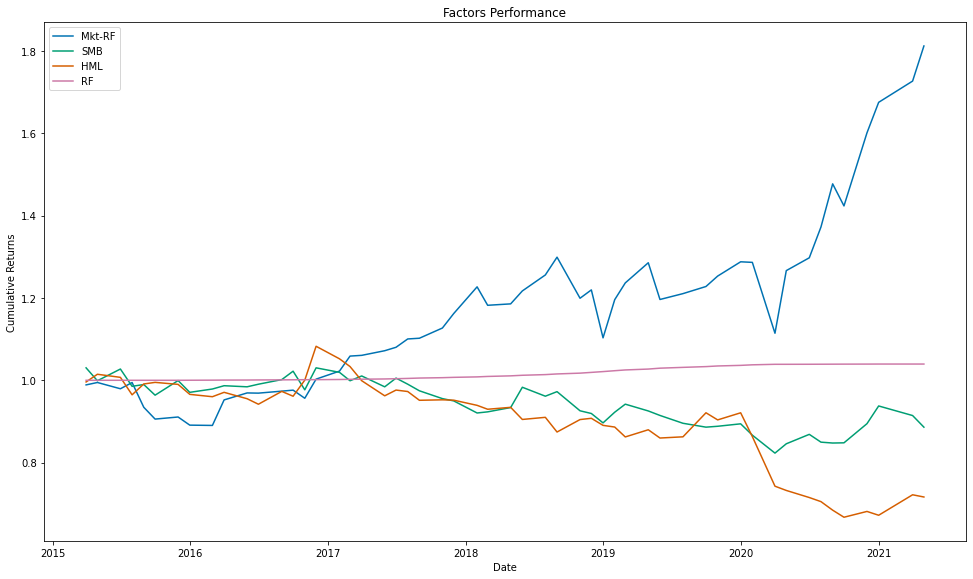

In [15]:
## compone los retornos 
cumulative_factor_returns = (all_data + 1).cumprod()

## y plotea:
fig = plt.figure(figsize=(16,9)) #le da el tamaño al grafico
ax1 = fig.add_axes([0.1,0.1,0.8,0.8]) # define los ejes del grafico
ax1.plot(cumulative_factor_returns.iloc[:,5:9]) #plotea 

# agrega titulos, nombres y leyenda1
ax1.set_xlabel('Date') 
ax1.set_ylabel('Cumulative Returns')
ax1.set_title('Factors Performance')
ax1.legend(cumulative_factor_returns.iloc[:,5:9].columns, loc = 'upper left')
plt.show()

In [16]:
## le cambia el nombre a la columna Mkt-Rf por "mkt_excess"
all_data.rename(columns={"Mkt-RF":"mkt_excess"}, inplace=True)

## para cada ticker que tenemos definido, calcula el "exceso de retorno"
## que vendría a ser el retorno de ese mes - la risk free
## y crea una nueva columna para ese exceso de retorno
## por ejemplo: AMZN_excess es el retorno de AMZN - risk free

for nombres in tickers:
    all_data[nombres + '_excess'] = all_data[nombres] - all_data['RF']

all_data.tail()

,AMZN,GOOG,TSLA,NFLX,MELI,mkt_excess,SMB,HML,RF,AMZN_excess,GOOG_excess,TSLA_excess,NFLX_excess,MELI_excess
2020-09-30,-0.087579,-0.100711,-0.139087,-0.055763,-0.073687,-0.0363,0.0006,-0.0251,0.0001,-0.087679,-0.100811,-0.139187,-0.055863,-0.073787
2020-11-30,0.043440,0.086199,0.462736,0.031446,0.279461,0.1247,0.0548,0.0211,0.0001,0.043340,0.086099,0.462636,0.031346,0.279361
2020-12-31,0.028058,-0.005032,0.243252,0.101956,0.078470,0.0463,0.0481,-0.0136,0.0001,0.027958,-0.005132,0.243152,0.101856,0.078370
2021-03-31,0.000372,0.015597,-0.011207,-0.031901,-0.101318,0.0308,-0.0248,0.0740,0.0000,0.000372,0.015597,-0.011207,-0.031901,-0.101318
2021-04-30,0.120663,0.165080,0.062147,-0.015700,0.067140,0.0494,-0.0309,-0.0075,0.0000,0.120663,0.165080,0.062147,-0.015700,0.067140


In [17]:
## aca importa statsmodel
import statsmodels.formula.api as sm

#model = sm.ols(formula = "MELI_excess ~ mkt_excess + HML + SMB", data = all_data).fit()

## y va a hacer una regresion de MELI_excess (o sea, el retorno de MELI - la risk free)
## contra mkt_excess que sería el mercado - la risk free
## la notación MELI_excess ~ mkt_excess (creo que python la adoptó de R?)
## es el siguiente modelo:
## MELI_excess = beta0 + beta1 * mkt_excess 

## define el modelo y lo ajusta
model = sm.ols(formula = "MELI_excess ~ mkt_excess", data = all_data).fit()

## el siguiente cacho de codigo lo voy a modificar un poco para que sea mas legible

### muestra los parametros 
print("Parámetros del modelo:")
print(model.params)
print("\n")
## el r cuadrado ajustado
print(f"R cuadrado ajustado: {round(model.rsquared_adj,2)}")
## y si los p values están por debajo de 0.05
print("\n")
print("Son significativos los parámetros?")
print(model.pvalues<0.05)


Parámetros del modelo:
Intercept     0.017991
mkt_excess    1.537701
dtype: float64


R cuadrado ajustado: 0.3


Son significativos los parámetros?
Intercept     False
mkt_excess     True
dtype: bool


## Conclusiones:
Para discutir en esta sesión vamos a verlo desde dos ópticas diferentes:
* [AQR's Superstar Investors](https://www.aqr.com/Insights/Research/Alternative-Thinking/Superstar-Investors): plantea entender a un listado de inversores famosos desde un punto de vista de analizarlos por factores.
* [SEC vs. LJM Funds Management et al.](https://www.sec.gov/litigation/complaints/2021/comp-pr2021-89.pdf): Un caso famoso de un blow-up producto de un mal manejo de riesgo.